In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def _load_data(data, seq_len=100):
    x, y = [], []
    for i in range(0, len(data)-seq_len):
        x.append(data.iloc[i:i+seq_len].values)
        y.append(data.iloc[i+seq_len].values)
        
    return np.array(x), np.array(y)

In [3]:
# データ成形

In [4]:
raw_csv = pd.read_csv("./fgo_gacha_raw.csv", header=None).dropna().astype(int)
raw_arr = np.array(raw_csv).reshape(-1, 1)
data_arr = raw_arr[raw_arr <= 33]
data_arr = np.where(data_arr == 11, 10, data_arr)
data_arr = np.where(data_arr == 22, 11, data_arr)
data_arr = np.where(data_arr == 33, 12, data_arr)
data = pd.DataFrame(data_arr, columns=["gacha"])
#data.head(30).plot()

In [5]:
# データセット作成

In [6]:
# 1系列データの長さ
length_of_sequence = 50
# 全データに対するテストデータの割合
train_data_ratio = 0.9
train_size = int(round(len(data) * train_data_ratio))

X_train, y_train = _load_data(data[["gacha"]].iloc[0:train_size], length_of_sequence)
X_test, y_test = _load_data(data[["gacha"]].iloc[train_size:], length_of_sequence)

X_test.shape

(1263, 50, 1)

In [7]:
# ネットワーク構成

In [8]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM

Using TensorFlow backend.


In [9]:
in_out_neurons = 1
hidden_neurons = 300

model = Sequential()
model.add(LSTM(hidden_neurons,
               batch_input_shape=(None, length_of_sequence, in_out_neurons),
               return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
model.compile(loss="mean_squared_error", optimizer="rmsprop")

In [10]:
model.fit(X_train, y_train, batch_size=600, epochs=500, validation_split=0.05)

Train on 11183 samples, validate on 589 samples
Epoch 1/500
11183/11183 [==============================] - 26s 2ms/step - loss: 10.6418 - val_loss: 8.3115
Epoch 2/500
11183/11183 [==============================] - 25s 2ms/step - loss: 8.9154 - val_loss: 8.3613
Epoch 3/500
11183/11183 [==============================] - 23s 2ms/step - loss: 8.8725 - val_loss: 8.3790
Epoch 4/500
11183/11183 [==============================] - 22s 2ms/step - loss: 8.8773 - val_loss: 8.5055
Epoch 5/500
11183/11183 [==============================] - 22s 2ms/step - loss: 8.8445 - val_loss: 8.3368
Epoch 6/500
11183/11183 [==============================] - 22s 2ms/step - loss: 8.8489 - val_loss: 8.3457
Epoch 7/500
11183/11183 [==============================] - 22s 2ms/step - loss: 8.8109 - val_loss: 8.3531
Epoch 8/500
11183/11183 [==============================] - 22s 2ms/step - loss: 8.8200 - val_loss: 8.4489
Epoch 9/500
11183/11183 [==============================] - 25s 2ms/step - loss: 8.8113 - val_loss: 8.32

11183/11183 [==============================] - 24s 2ms/step - loss: 8.7209 - val_loss: 8.5704
Epoch 78/500
11183/11183 [==============================] - 24s 2ms/step - loss: 8.7215 - val_loss: 8.5659
Epoch 79/500
11183/11183 [==============================] - 24s 2ms/step - loss: 8.7234 - val_loss: 8.5223
Epoch 80/500
11183/11183 [==============================] - 24s 2ms/step - loss: 8.7241 - val_loss: 8.5365
Epoch 81/500
11183/11183 [==============================] - 24s 2ms/step - loss: 9.1299 - val_loss: 8.4932
Epoch 82/500
11183/11183 [==============================] - 24s 2ms/step - loss: 8.7057 - val_loss: 8.4691
Epoch 83/500
11183/11183 [==============================] - 24s 2ms/step - loss: 8.6983 - val_loss: 8.4124
Epoch 84/500
11183/11183 [==============================] - 24s 2ms/step - loss: 8.7007 - val_loss: 8.5508
Epoch 85/500
11183/11183 [==============================] - 24s 2ms/step - loss: 8.7107 - val_loss: 8.5465
Epoch 86/500
11183/11183 [========================

11183/11183 [==============================] - 22s 2ms/step - loss: 6.6414 - val_loss: 11.1324
Epoch 154/500
11183/11183 [==============================] - 22s 2ms/step - loss: 6.6082 - val_loss: 11.6473
Epoch 155/500
11183/11183 [==============================] - 21s 2ms/step - loss: 6.6572 - val_loss: 11.1719
Epoch 156/500
11183/11183 [==============================] - 20s 2ms/step - loss: 6.4600 - val_loss: 10.8739
Epoch 157/500
11183/11183 [==============================] - 20s 2ms/step - loss: 6.3651 - val_loss: 10.6958
Epoch 158/500
11183/11183 [==============================] - 21s 2ms/step - loss: 6.3842 - val_loss: 11.7238
Epoch 159/500
11183/11183 [==============================] - 20s 2ms/step - loss: 6.2939 - val_loss: 11.1726
Epoch 160/500
11183/11183 [==============================] - 21s 2ms/step - loss: 6.1747 - val_loss: 11.9378
Epoch 161/500
11183/11183 [==============================] - 20s 2ms/step - loss: 6.2827 - val_loss: 11.5826
Epoch 162/500
11183/11183 [======

11183/11183 [==============================] - 25s 2ms/step - loss: 2.1925 - val_loss: 14.3253
Epoch 229/500
11183/11183 [==============================] - 25s 2ms/step - loss: 2.2147 - val_loss: 14.9586
Epoch 230/500
11183/11183 [==============================] - 24s 2ms/step - loss: 2.2045 - val_loss: 14.3924
Epoch 231/500
11183/11183 [==============================] - 24s 2ms/step - loss: 2.0626 - val_loss: 15.0071
Epoch 232/500
11183/11183 [==============================] - 25s 2ms/step - loss: 2.1223 - val_loss: 14.4212
Epoch 233/500
11183/11183 [==============================] - 25s 2ms/step - loss: 1.9701 - val_loss: 14.6168
Epoch 234/500
11183/11183 [==============================] - 27s 2ms/step - loss: 1.9458 - val_loss: 16.1699
Epoch 235/500
11183/11183 [==============================] - 26s 2ms/step - loss: 2.0460 - val_loss: 15.0910
Epoch 236/500
11183/11183 [==============================] - 27s 2ms/step - loss: 1.8108 - val_loss: 15.4136
Epoch 237/500
11183/11183 [======

11183/11183 [==============================] - 21s 2ms/step - loss: 0.5578 - val_loss: 15.0693
Epoch 304/500
11183/11183 [==============================] - 21s 2ms/step - loss: 0.8165 - val_loss: 14.6428
Epoch 305/500
11183/11183 [==============================] - 20s 2ms/step - loss: 0.6515 - val_loss: 14.5302
Epoch 306/500
11183/11183 [==============================] - 20s 2ms/step - loss: 0.5753 - val_loss: 14.8225
Epoch 307/500
11183/11183 [==============================] - 20s 2ms/step - loss: 0.5218 - val_loss: 14.9777
Epoch 308/500
11183/11183 [==============================] - 20s 2ms/step - loss: 0.7986 - val_loss: 14.2044
Epoch 309/500
11183/11183 [==============================] - 20s 2ms/step - loss: 0.6291 - val_loss: 15.5188
Epoch 310/500
11183/11183 [==============================] - 20s 2ms/step - loss: 0.6066 - val_loss: 16.0519
Epoch 311/500
11183/11183 [==============================] - 20s 2ms/step - loss: 0.6125 - val_loss: 15.4996
Epoch 312/500
11183/11183 [======

11183/11183 [==============================] - 20s 2ms/step - loss: 0.2143 - val_loss: 13.5391
Epoch 379/500
11183/11183 [==============================] - 20s 2ms/step - loss: 0.4106 - val_loss: 14.2773
Epoch 380/500
11183/11183 [==============================] - 21s 2ms/step - loss: 0.3471 - val_loss: 13.8518
Epoch 381/500
11183/11183 [==============================] - 21s 2ms/step - loss: 0.4551 - val_loss: 14.0267
Epoch 382/500
11183/11183 [==============================] - 21s 2ms/step - loss: 0.2650 - val_loss: 14.5970
Epoch 383/500
11183/11183 [==============================] - 20s 2ms/step - loss: 0.3661 - val_loss: 14.4728
Epoch 384/500
11183/11183 [==============================] - 20s 2ms/step - loss: 0.3705 - val_loss: 13.7613
Epoch 385/500
11183/11183 [==============================] - 21s 2ms/step - loss: 0.3376 - val_loss: 14.5822
Epoch 386/500
11183/11183 [==============================] - 20s 2ms/step - loss: 0.3606 - val_loss: 13.9487
Epoch 387/500
11183/11183 [======

11183/11183 [==============================] - 20s 2ms/step - loss: 0.3843 - val_loss: 13.6268
Epoch 454/500
11183/11183 [==============================] - 20s 2ms/step - loss: 0.1190 - val_loss: 13.2649
Epoch 455/500
11183/11183 [==============================] - 21s 2ms/step - loss: 0.2599 - val_loss: 13.4544
Epoch 456/500
11183/11183 [==============================] - 20s 2ms/step - loss: 0.2127 - val_loss: 13.6472
Epoch 457/500
11183/11183 [==============================] - 20s 2ms/step - loss: 0.2064 - val_loss: 13.2271
Epoch 458/500
11183/11183 [==============================] - 20s 2ms/step - loss: 0.2663 - val_loss: 13.6958
Epoch 459/500
11183/11183 [==============================] - 20s 2ms/step - loss: 0.3674 - val_loss: 13.5354
Epoch 460/500
11183/11183 [==============================] - 20s 2ms/step - loss: 0.1235 - val_loss: 13.1959
Epoch 461/500
11183/11183 [==============================] - 21s 2ms/step - loss: 0.1867 - val_loss: 13.7394
Epoch 462/500
11183/11183 [======

In [11]:
predicted = model.predict(X_test)

e:\python\python36\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['RictyDiminished-Regular'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


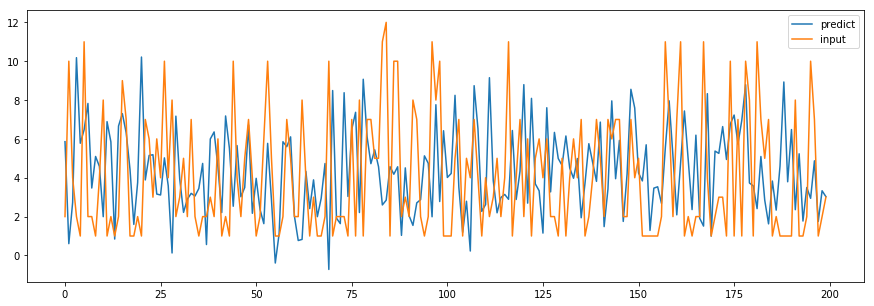

In [14]:
show_data = 200
dataf = pd.DataFrame(predicted[:show_data])
dataf.columns = ["predict"]
dataf["input"] = y_test[:show_data]
dataf.plot(figsize=(15, 5))

In [15]:
dataf

,predict,input
0,5.856544,2
1,0.605757,10
2,2.728957,4
3,10.181730,2
4,5.776021,1
5,6.467946,11
6,7.824917,2
7,3.471049,2
8,5.094925,1
9,4.582833,4
